In [1]:
import InsertionDeletionComplex_updated as IDC
import pandas as pd
import numpy as np
import persim
import matplotlib.pyplot as plt

In [3]:
def get_color(label):
    if 'AB' in label:
        return 'red'
    if 'CD' in label:
        return 'orange'
    if 'A' in label:
        return 'green'
    if 'B' in label:
        return 'blue'
    else:
        return 'black'

In [4]:
%matplotlib inline
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, orientation='right',**kwargs,color_threshold=0)
    ax = plt.gca()
    ylbls = ax.get_ymajorticklabels()
    for i in range(len(ylbls)):
        ylbls[i].set_color(get_color(ylbls[i].get_text()))
    plt.gcf().subplots_adjust(bottom=0.5)

In [6]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [7]:
sample_n=100
X=np.zeros((28+24,5*(sample_n-1)))
id_exp=0
labels=[]
Complexes=[]


In [8]:
from InsertionDeletionComplex_updated import *
with open('Random_Experiments.pickle', 'rb') as handle:
    Random_Filtrations=pickle.load(handle)   

for K in Random_Filtrations:
    labels.append(K.name)
    Freqs=K.filtration_values
    
    F_vectors=[]
    for val in Freqs:
        MF=K.get_Maximal_Faces(val,True)
        F_vectors.append([len(MF[dim]) for dim in MF]+[0]*max(0,5-max(MF)))
    F_vectors=np.array(F_vectors)
    Cum_Freqs=np.cumsum(Freqs)
    
    xs=np.power(10,np.linspace(-7,0,num=sample_n))
    all_y=[]
    for dim in range(5):
        y=F_vectors[:,dim]
        ys=[y[sum(Cum_Freqs<x)] for x in xs[:-1]]
        all_y.append(ys)
        
    all_y=np.array(all_y).ravel()
    
    X[id_exp]=all_y
    id_exp+=1

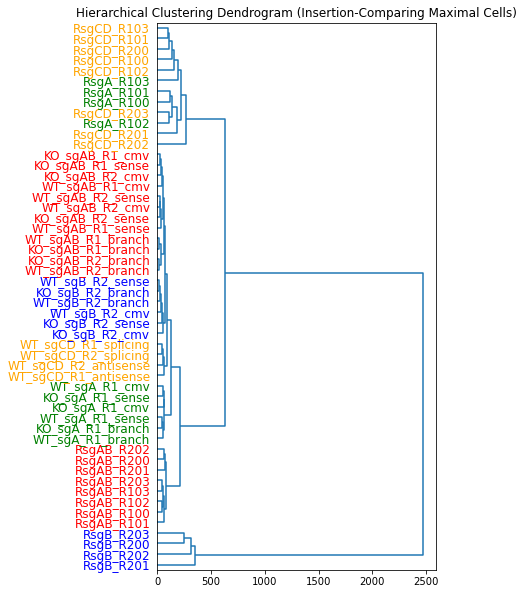

In [9]:
%matplotlib inline
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None,linkage='average')
model = model.fit(X)

#labels=[a[0] for a in All_persistent_diagrams[:28]]
plt.figure(figsize=(5,20))
plt.title("Hierarchical Clustering Dendrogram (Insertion-Comparing Maximal Cells)")
fig=plot_dendrogram(model, truncate_mode="level",labels=labels,
                leaf_font_size=12)

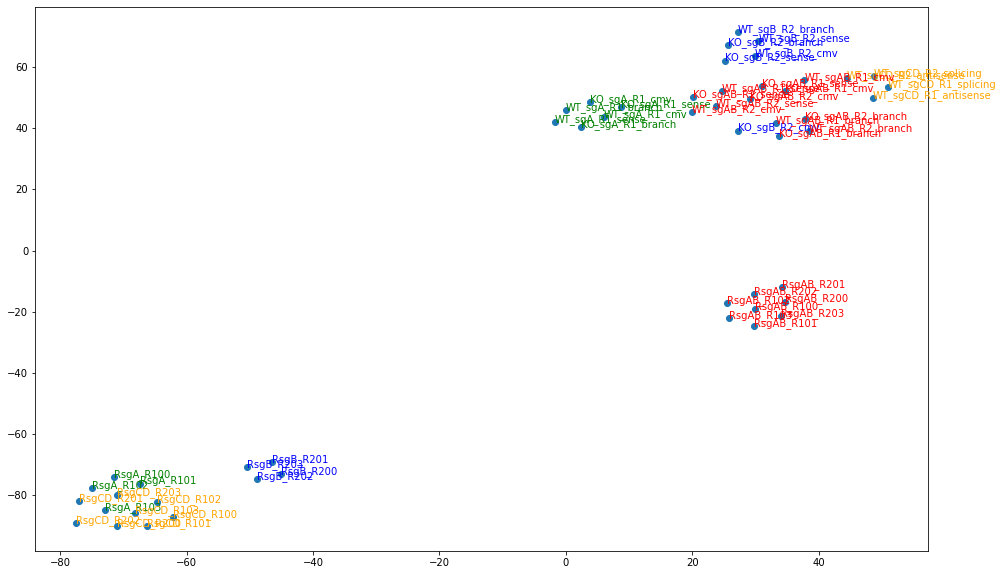

In [10]:
%matplotlib inline
tSNE=TSNE(metric='euclidean',random_state=100,perplexity=10,n_components=2,)
Y=tSNE.fit_transform(X)
plt.figure(figsize=(16,10))
plt.scatter(Y[:,0],Y[:,1])
for i,label in enumerate(labels):
    plt.text(Y[i,0],Y[i,1],label,color=get_color(label))
plt.show()